# **Build End-to-End ML Pipeline for Truck Delay Classification**


The project addresses a critical challenge faced by the logistics industry. Delayed truck shipments not only result in increased operational costs but also impact customer satisfaction. Timely delivery of goods is essential to meet customer expectations and maintain the competitiveness of logistics companies.
By accurately predicting truck delays, logistics companies can:
* Improve operational efficiency by allocating resources more effectively.
* Enhance customer satisfaction by providing more reliable delivery schedules.
* Optimize route planning to reduce delays caused by traffic or adverse weather conditions.
* Reduce costs associated with delayed shipments, such as penalties or compensation to customers.

This project is the first part of a three-part series aimed at solving the truck delay prediction problem. In this initial phase, we will utilize PostgreSQL and MYSQL in AWS Redshift to store the data, perform data retrieval, and conduct basic exploratory data analysis (EDA). With Hopsworks feature store, we will build a pipeline that includes data processing feature engineering and prepare the data for model building.

![image.png](https://images.pexels.com/photos/2199293/pexels-photo-2199293.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)


## **Approach**


* Introduction to End-to-End Pipelines:
  * Understanding the fundamental concepts and importance of end-to-end pipelines


* Database Setup:
  * Creating AWS RDS instances for MySQL and PostgreSQL
  * Setting up MySQL Workbench and pgAdmin4 for database management


* Data Analysis:
  * Performing data analysis using SQL on MySQL Workbench and pgAdmin4


* AWS SageMaker Setup


* Exploratory Data Analysis (EDA):
  * Conducting exploratory data analysis to understand essential features and the dataset's characteristics


* Feature Store:
  * Understanding the concept of a feature store and its significance in machine learning projects
  * Understanding how Hopsworks works to facilitate project creation and feature group management


* Data Retrieval from Feature Stores

* Fetching data from feature stores for further analysis


* Data Preprocessing and Feature Engineering


* Data Storage:
  * Storing the final engineered features in the feature store for easy access and consistency



## System Requirements

* python version : 3.10.2

## Library Requirements

* pymysql==1.1.0
* psycopg2==2.9.7
* pandas==1.5.3
* numpy==1.23.5
* matplotlib==3.7.1
* seaborn==0.12.2
* hopsworks==3.2.0

## **Key Learnings**

* What are end-to-end machine learning pipelines, and why are they important?

* How to create an AWS RDS instance?
* How to connect with the database using MYSQL Workbench and Pgadmin4?
* How to recover data using bak files in a database?
* How to do Data Analysis using SQL?
* How to set up an AWS Sagemaker Notebook?
* How to fetch data from AWS RDS using Python?
* Understanding Business Insights through Exploratory Data Analysis
* Understand the significance of Feature Stores
* Learn about Hopsworks Feature Store
* How to create feature groups in Hopsworks?
* How to fetch data from Hopsworks?
* Understand data preprocessing to ensure quality and consistency.
* Learn different feature engineering techniques.


## **Data Fetching**

## **Postgres to Python Connector**

In [ ]:
!pip install psycopg2==2.9.7

In [ ]:
# Import the psycopg2 library for PostgreSQL connection
import psycopg2

# Import the pandas library for data manipulation
import pandas as pd

# Establish a connection to the PostgreSQL database
postgres_connection = psycopg2.connect(
    user="postgres",             # PostgreSQL username
    password="your_passowrd",    # Password for the database
    host="host_id.rds.amazonaws.com",   # Host ID of the RDS instance
    database="DB",               # Name of the database
    port="5432"                  # Port number for PostgreSQL
)


### Retrieve City details data from database
*   Database - Postgres
*   Table name - routes_details

In [ ]:
# Read data from the "routes_details" table in the PostgreSQL database
routes_df = pd.read_sql("Select * from routes_details", postgres_connection)

# Display the first few rows of the routes dataframe
routes_df.head()


,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


### Retrieve Route details data from database
*   Database - Postgres
*   Table name - route_details

In [ ]:
# Read data from the "routes_weather" table in the PostgreSQL database
route_weather = pd.read_sql("Select * from routes_weather", postgres_connection)

# Display the first few rows of the route weather dataframe
route_weather.head()


,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27.0,11.0,Cloudy,0.0,92,6.0,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27.0,9.0,Cloudy,0.0,93,6.0,1016,0,0,0,0


In [ ]:
# Rename the column for consistency
route_weather=route_weather.rename(columns={'Date':'date'})

## MySQL to Python Connector

In [ ]:
!pip install pymysql==1.1.0

In [ ]:
# Import the pymysql library for MySQL connection
import pymysql

# Import the numpy library and alias it as np
import numpy as np

# Establish a connection to the MySQL database
mysql_connection = pymysql.connect(
     host = "host_id.rds.amazonaws.com",  # Host ID of the RDS instance
     user = "admin",                       # MySQL username
     password = "your_password",           # Password for the database
     database = "DB"                       # Name of the database
)


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - driver_details

In [ ]:
# Read data from the "drivers_details" table in the MySQL database
drivers_df = pd.read_sql("Select * from drivers_details", mysql_connection)

# Display the first two rows of the drivers dataframe
drivers_df.head(2)


,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


### Retrieve Truck details data from database
*   Database - MySQL
*   Table name - truck_details

In [ ]:
# Read data from the "truck_details" table in the MySQL database
trucks_df = pd.read_sql("Select * from truck_details", mysql_connection)

# Display the first few rows of the trucks dataframe
trucks_df.head()


,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - traffic_details

In [ ]:
# Read data from the "traffic_details" table in the MySQL database
traffic_df = pd.read_sql("Select * from traffic_details", mysql_connection)

# Display the first few rows of the traffic dataframe
traffic_df.head()


,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - truck_schedule_data

In [ ]:
# Read data from the "truck_schedule_data" table in the MySQL database
schedule_df = pd.read_sql("Select * from truck_schedule_data", mysql_connection)

# Display the first few rows of the schedule dataframe
schedule_df.head()


### Retrieve Driver details data from database
*   Database - MySQL
*   Table name - city_weather

In [ ]:
# Read data from the "city_weather" table in the MySQL database
weather_df = pd.read_sql("Select * from city_weather", mysql_connection)

# Display the first few rows of the weather dataframe
weather_df.head()


,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0
2,C-927ceb5e,2019-01-01,200,28.0,13.0,Moderate snow,0.0,85,4.0,1022.0,0.0,0.0,0.0,0.0
3,C-927ceb5e,2019-01-01,300,28.0,14.0,Moderate snow,0.0,84,3.0,1024.0,0.0,0.0,0.0,0.0
4,C-927ceb5e,2019-01-01,400,28.0,13.0,Moderate snow,0.0,84,3.0,1025.0,0.0,0.0,0.0,0.0


## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data.

It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


### **Data Exploration**

Data exploration is a critical step in the data analysis process, where you examine the dataset to gain a preliminary understanding of the data, detect patterns, and identify potential issues that may need further investigation. Data exploration is important because it helps to provide a solid foundation for subsequent data analysis tasks, hypothesis testing and data visualization.

Data exploration is also important because it can help you to identify an appropriate approach for analyzing the data.

Here are the various functions that help us explore and understand the data.

* Shape: Shape is used to identify the dimensions of the dataset. It gives the number of rows and columns present in the dataset. Knowing the dimensions of the dataset is important to understand the amount of data available for analysis and to determine the feasibility of different methods of analysis.

* Head: The head function is used to display the top five rows of the dataset. It helps us to understand the structure and organization of the dataset. This function gives an idea of what data is present in the dataset, what the column headers are, and how the data is organized.

* Tail: The tail function is used to display the bottom five rows of the dataset. It provides the same information as the head function but for the bottom rows. The tail function is particularly useful when dealing with large datasets, as it can be time-consuming to scroll through all the rows.

* Describe: The describe function provides a summary of the numerical columns in the dataset. It includes the count, mean, standard deviation, minimum, and maximum values, as well as the quartiles. It helps to understand the distribution of the data, the presence of any outliers, and potential issues that can affect the model's accuracy.

* Isnull: The isnull function is used to identify missing values in the dataset. It returns a Boolean value for each cell, indicating whether it is null or not. This function is useful to identify the presence of missing data, which can be problematic for regression analysis.

* Dropna: The dropna function is used to remove rows or columns with missing data. It is used to remove any observations or variables with missing data, which can lead to biased results in the regression analysis. The dropna function is used after identifying the missing data with the isnull function.

* Columns: The .columns method is a built-in function that is used to display the column names of a pandas DataFrame or Series. It returns an array-like object that contains the names of the columns in the order in which they appear in the original DataFrame or Series. It can be used to obtain a quick overview of the variables in a dataset and their names.

In [ ]:
# Import Libraries

# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [ ]:
# Change dates to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])
route_weather['date'] = pd.to_datetime(route_weather['date'])
traffic_df['date'] = pd.to_datetime(traffic_df['date'])
schedule_df['departure_date'] = pd.to_datetime(schedule_df['departure_date'])
schedule_df['estimated_arrival'] = pd.to_datetime(schedule_df['estimated_arrival'])
route_weather['date'] = pd.to_datetime(route_weather['date'])

### **Driver's Data Analysis**

In [ ]:
# Driver's data
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


In [ ]:
# Driver's data info
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


Gender and driving styles have some missing values

Dtypes seem to be in order

In [ ]:
# statistics of various columns
drivers_df.describe(include='all')

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
count,1300,1300,1277,1300.000000,1300.000000,1248,1300.000000,1.300000e+03,1300.000000
unique,1300,1274,2,NaN,NaN,2,NaN,NaN,NaN
top,d9f30553-6,Michael Parker,male,NaN,NaN,proactive,NaN,NaN,NaN
freq,1,3,1198,NaN,NaN,648,NaN,NaN,NaN
mean,NaN,NaN,NaN,47.814615,11.988462,NaN,5.633846,3.263242e+07,53.262854
std,NaN,NaN,NaN,4.973240,6.951765,NaN,2.137266,2.205390e+07,8.504282
min,NaN,NaN,NaN,28.000000,-8.000000,NaN,2.000000,1.000839e+07,29.150000
25%,NaN,NaN,NaN,45.000000,7.000000,NaN,4.000000,1.817244e+07,45.427500
50%,NaN,NaN,NaN,48.000000,11.000000,NaN,6.000000,2.584212e+07,57.340000
75%,NaN,NaN,NaN,51.000000,17.000000,NaN,8.000000,3.340052e+07,60.350000


### **Distribution Plots**

Distribution plots are graphical representations that show the distribution of a set of numerical data. These plots are used to gain insight into the characteristics of the data, such as the central tendency, spread, and skewness. There are several types of distribution plots, including histograms, density plots, box plots, and violin plots.

* A histogram is a bar graph that represents the frequency distribution of a set of data. It shows how many data points fall into each range of values or bin. The bars in the histogram represent the frequency of data points within a given range, and the height of each bar represents the number of data points in that bin.

* A density plot is a smoothed representation of the distribution of the data, which is calculated by fitting a probability density function to the histogram of the data. It shows the shape of the distribution and provides a visual representation of the relative density of the data at different values.

* A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a set of data. It shows the median, quartiles, and outliers of the data in a compact and easily interpretable format. The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend from the box to the minimum and maximum values of the data, and any outliers are plotted as individual points outside the whiskers.

* A violin plot is a combination of a density plot and a box plot, showing the density of the data along the y-axis and the distribution along the x-axis. It shows the distribution of the data in a compact format, and provides information on the central tendency, spread, and skewness of the data.

* Distribution plots are an important tool for exploratory data analysis and can help in understanding the distribution of the data, identifying patterns and outliers, and making informed decisions about the data. They provide a visual representation of the data and can be used to identify potential issues with the data, such as non-normality or outliers.

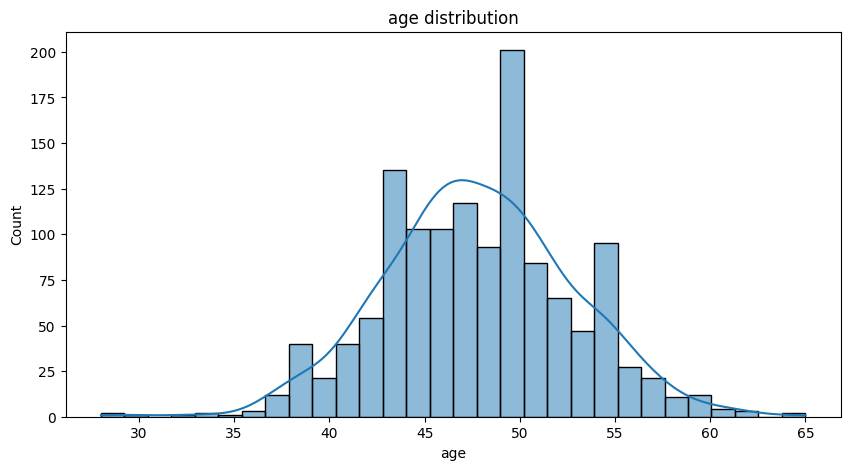

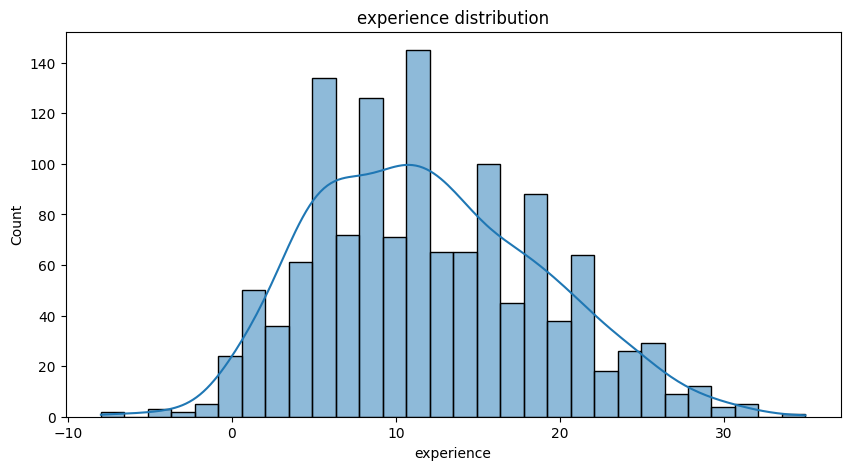

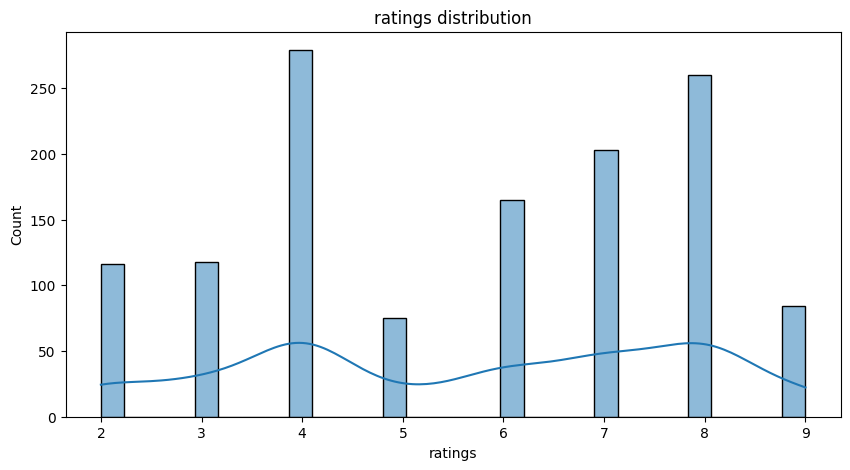

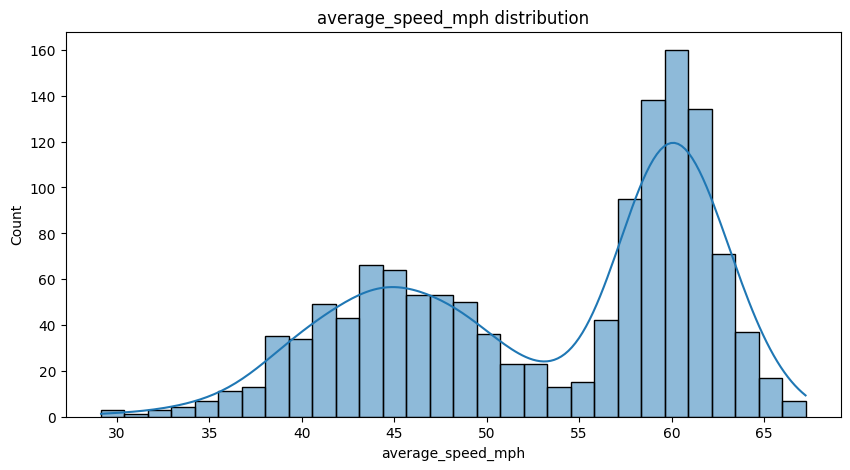

In [ ]:
# List of numerical columns to visualize
drivers_num_cols = ['age', 'experience', 'ratings', 'average_speed_mph']

# Loop through each numerical column and create histograms with KDE
for col in drivers_num_cols:
    plt.figure(figsize=(10, 5))

    # Create a histogram with KDE using seaborn
    sns.histplot(drivers_df[col], bins=30, kde=True)
    # Set the title
    plt.title(f'{col} distribution')
    # Set the label for the x-axis
    plt.xlabel(f'{col}')
    plt.show()

#### Age:

The distribution of drivers' ages is approximately normally distributed, with the majority of drivers falling in the range of 45 to 50 years.

Recommendation: While it's true that older drivers may have more experience, they may also be more susceptible to fatigue or health-related issues. Assign routes based on the driver's experience level and health conditions. Longer and more complex routes may be more demanding and tiring, which may lead to delay.

Implement appropriate rest break policies and adhere to regulations regarding maximum working hours. Ensuring sufficient rest periods during and between routes can help prevent driver fatigue.

Provide drivers with training on proper driving techniques

Consider rotating drivers on different types of routes to avoid monotony and reduce the impact of repetitive tasks

#### Experience:

The distribution of driver experience is right-skewed, with most drivers having experience between 5 to 50 years.

Recommendation: The company could analyze the performance metrics of drivers with different experience levels to identify if there are any correlations between experience and driving efficiency. This analysis can help optimize driver assignment to different types of routes.


#### Ratings:

The significant count of ratings below 5 out of 10 suggests that there is a considerable proportion of drivers with lower ratings.

Lower ratings may indicate potential issues with driver performance or customer satisfaction.

Recommendation: The company should investigate the reasons behind lower ratings and take necessary steps to address driver performance, provide additional training, or offer incentives to improve driver ratings and enhance overall customer satisfaction.


#### Average Speed:

The bimodal distribution of average speeds, peaking around 45 and 60 mph, suggests the presence of two distinct groups of drivers with different driving styles.

This bimodal pattern may indicate a split between drivers who adopt a more cautious driving style (lower average speed) and those who adopt a more aggressive driving style (higher average speed) both are not recommended.

Recommendation: The company can consider categorizing drivers based on their average speed behavior and analyze how different driving styles impact ETA, fuel efficiency, and safety.

This can help with training and driving style guidelines for drivers for overall improvemnent in delivery times.

In [ ]:
# Counts of gender
drivers_df['gender'].value_counts()

male      1198
female      79
Name: gender, dtype: int64

In [ ]:
# Value counts of driving style
drivers_df['driving_style'].value_counts()

proactive       648
conservative    600
Name: driving_style, dtype: int64

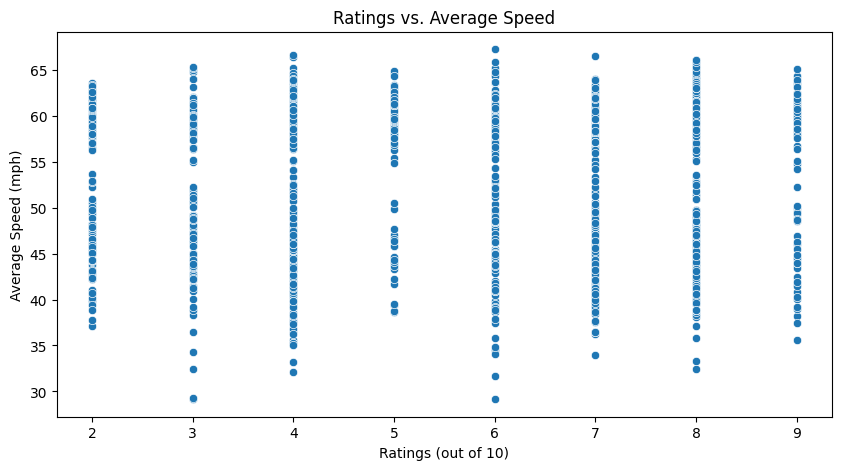

In [ ]:
# Setting figure size
plt.figure(figsize=(10, 5))
# plotting scatter plot between ratings and average speed
sns.scatterplot(x='ratings', y='average_speed_mph', data=drivers_df)
plt.title('Ratings vs. Average Speed')
plt.xlabel('Ratings (out of 10)')
plt.ylabel('Average Speed (mph)')
plt.show()

No significant relationship - Ratings may be because of some other factors.

### **Boxplots**
Boxplots, also known as box-and-whisker plots, are a type of graphical representation used to display the distribution, spread, and central tendency of a dataset. They provide a concise summary of the data's key statistical properties.

Components of a Boxplot
A boxplot consists of the following elements:

* Box: The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data. The lower edge of the box represents the first quartile (Q1), and the upper edge represents the third quartile (Q3).

* Whiskers: The whiskers extend from the box and represent the range of the data. They indicate the minimum and maximum values within a certain range, often defined by a formula (e.g., 1.5 times the IQR).

* Median Line: A vertical line inside the box represents the median (Q2) of the dataset.

* Outliers: Individual data points that fall outside the whiskers are considered outliers. They are plotted as individual points beyond the whiskers.

Interpreting a Boxplot

* Central Tendency: The median line gives the central value of the data.
Spread: The length of the box (IQR) indicates the spread of the central 50% of the data.

* Skewness: Asymmetry in the data can be observed by comparing the lengths of the whiskers. If one whisker is longer than the other, it suggests skewness.

* Outliers: Outliers are points outside the whiskers. They can provide insights into anomalies or extreme values in the data.

Use Cases of Boxplots

* Identifying Outliers: Boxplots are useful for identifying outliers in a dataset.

* Comparing Distributions: They allow for quick visual comparison of the distribution of multiple datasets.

* Summarizing Data

* Detecting Skewness: They can reveal whether a dataset is symmetric or skewed.



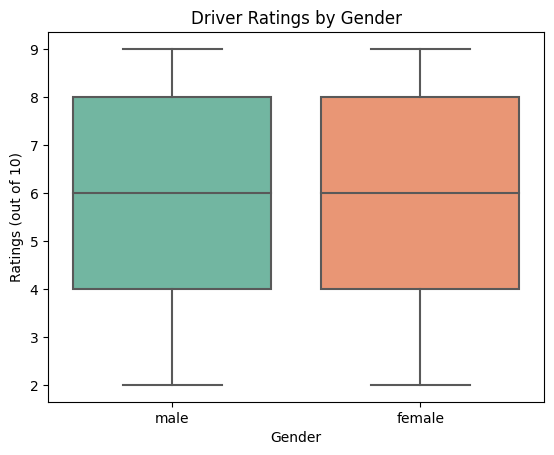

In [ ]:
# Boxplot between gender and ratings
sns.boxplot(x='gender', y='ratings', data=drivers_df, palette='Set2')
plt.title('Driver Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratings (out of 10)')
plt.show()

Average ratings are similar for both the genders.

### **Truck's Data Analysis**

In [ ]:
# Truck data head
trucks_df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


In [ ]:
# Info
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


load capacity and fuel type have missing values.

In [ ]:
# statistics of various columns
trucks_df.describe(include='all')

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
count,1.300000e+03,1300.000000,1243.000000,1300.000000,1300
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,diesel
freq,NaN,NaN,NaN,NaN,692
mean,3.263242e+07,9.513077,8610.619469,20.784615,NaN
std,2.205390e+07,2.039030,5583.759795,3.655876,NaN
min,1.000839e+07,3.000000,3000.000000,11.000000,NaN
25%,1.817244e+07,8.000000,4000.000000,18.000000,NaN
50%,2.584212e+07,10.000000,6000.000000,21.000000,NaN
75%,3.340052e+07,11.000000,15000.000000,24.000000,NaN


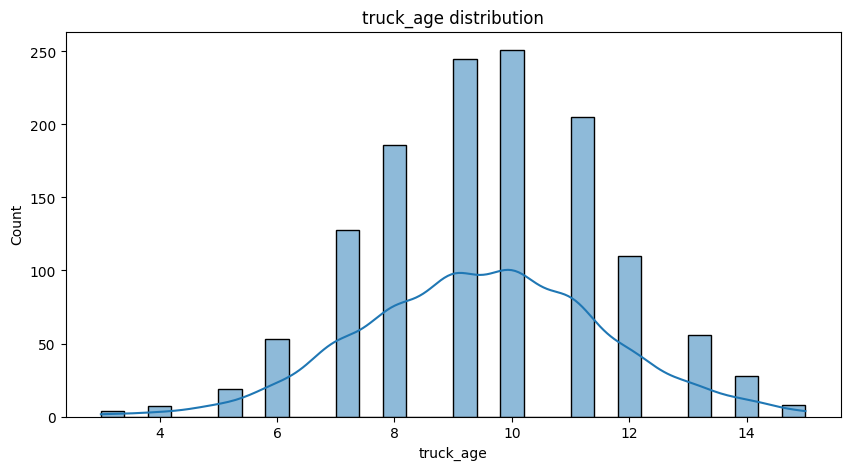

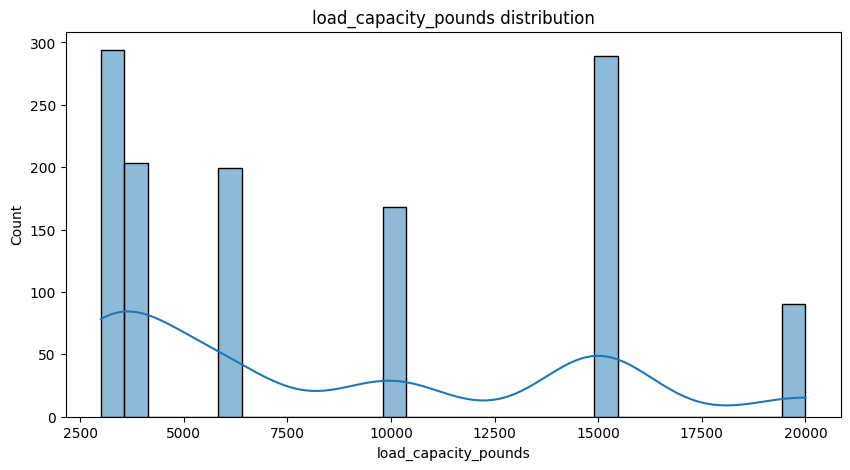

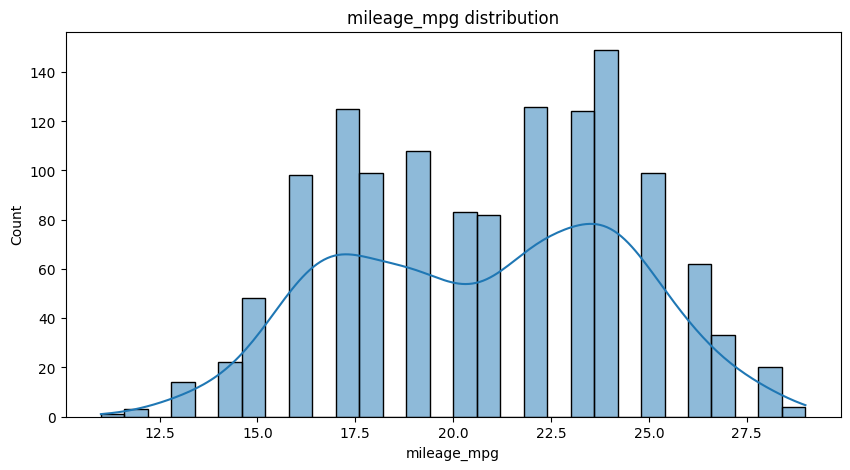

In [ ]:
# Numerical cols in truck's dataset
truck_num_cols = ['truck_age', 'load_capacity_pounds', 'mileage_mpg']

# plotting histogram for each column
for col in truck_num_cols:
  plt.figure(figsize=(10, 5))
  sns.histplot(trucks_df[col], bins=30, kde=True)
  plt.title(f'{col} distribution')
  plt.xlabel(f'{col}')
  plt.show()

Analyze the distribution of truck ages and identify older trucks that might be approaching the end of their useful life.

Identify trucks with significantly lower fuel efficiency. Implement strategies to improve fuel efficiency, such as regular maintenance, driver training, and adopting fuel-saving technologies.

Consider replacing trucks with low mileage or poor fuel efficiency with more fuel-efficient models.

In [ ]:
# According to the histogram, setting low mileage to be 15
low_mileage_threshold = 15

# Filter trucks with low mileage
low_mileage_trucks = trucks_df[trucks_df['mileage_mpg'] <= low_mileage_threshold]

In [ ]:
# overview of data of low mileage trucks
low_mileage_trucks.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
5,29303248,9,4000.0,15,gas
7,21093078,8,NaN,14,gas
20,96362807,11,3000.0,14,gas
27,25645401,12,6000.0,14,gas
35,14541120,12,15000.0,14,gas


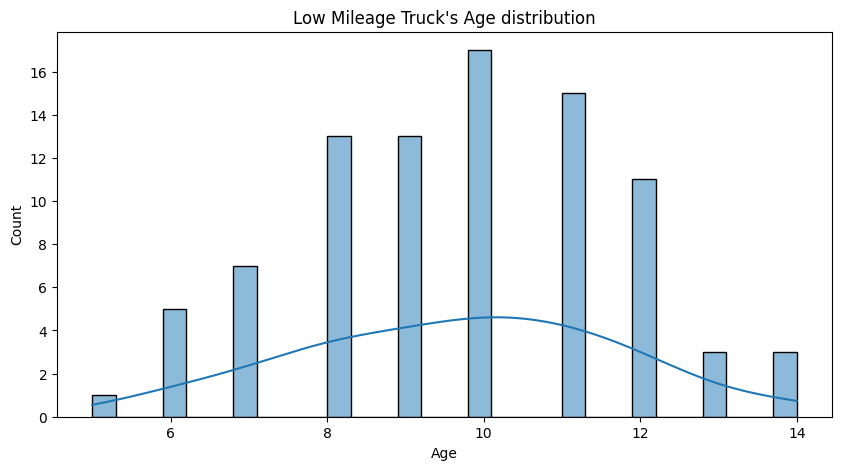

In [ ]:
# Age distribution of low mileage trucks
plt.figure(figsize=(10, 5))
sns.histplot(low_mileage_trucks['truck_age'], bins=30, kde=True)
plt.title(f"Low Mileage Truck's Age distribution")
plt.xlabel("Age")
plt.show()

Trucks more than 8 years of age has low mileage.

### **Routes Data Analysis**

In [ ]:
# Display the first rows
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [ ]:
# Information on dataframe
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


### **Traffic Data Analysis**

In [ ]:
# Traffic data head
traffic_df.head()

In [ ]:
# Info
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   route_id        object        
 1   date            datetime64[ns]
 2   hour            int64         
 3   no_of_vehicles  float64       
 4   accident        int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 99.1+ MB


In [ ]:
# Sum of null values
traffic_df.isnull().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [ ]:
# statistical description
traffic_df.describe()

,hour,no_of_vehicles,accident
count,2.597913e+06,2.596761e+06,2.597913e+06
mean,1.150021e+03,1.566776e+03,5.320848e-02
std,6.922211e+02,8.959424e+02,2.244490e-01
min,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.000000e+02,6.060000e+02,0.000000e+00
50%,1.200000e+03,1.969000e+03,0.000000e+00
75%,1.800000e+03,2.326000e+03,0.000000e+00
max,2.300000e+03,3.636000e+03,1.000000e+00


In [ ]:
# Sum of null values
traffic_df.isnull().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

There are 1152 null values

In [ ]:
# statistical description
traffic_df.describe()

,hour,no_of_vehicles,accident
count,2.597913e+06,2.596761e+06,2.597913e+06
mean,1.150021e+03,1.566776e+03,5.320848e-02
std,6.922211e+02,8.959424e+02,2.244490e-01
min,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.000000e+02,6.060000e+02,0.000000e+00
50%,1.200000e+03,1.969000e+03,0.000000e+00
75%,1.800000e+03,2.326000e+03,0.000000e+00
max,2.300000e+03,3.636000e+03,1.000000e+00


In [ ]:
def categorize_time(hour):
    """
    Categorizes hours of the day into time periods.

    Args:
    hour (int): Hour in 24-hour format.

    Returns:
    str: Categorized time period.
    """
    if 300 <= hour < 600:
        return 'Early Morning'
    elif 600 <= hour < 1200:
        return 'Morning'
    elif 1200 <= hour < 1600:
        return 'Noon'
    elif 1600 <= hour < 2000:
        return 'Evening'
    elif 2000 <= hour < 2300:
        return 'Night'
    elif 0 <= hour < 300:
        return 'Night'

# Create a copy of traffic_df
traffic = traffic_df.copy()

# Apply the categorize_time function to create a new column 'time_category'
traffic['time_category'] = traffic['hour'].apply(categorize_time)

# Group by 'time_category' and calculate the mean of 'no_of_vehicles'
mean_vehicles_by_time = traffic.groupby('time_category')['no_of_vehicles'].mean()


In [ ]:
# print
mean_vehicles_by_time

time_category
Early Morning     563.030071
Evening          1999.185426
Morning          1735.696694
Night            1263.594675
Noon             1990.786218
Name: no_of_vehicles, dtype: float64

Evening experiences the highest traffic with an average of 2006 vehicles, likely due to rush hour.

Morning follows closely with around 1738 vehicles, indicating significant traffic during the morning commute.

Noon has an average of approximately 1995 vehicles, reflecting continued high traffic for various activities during the day.

Early Morning sees the least traffic with around 562 vehicles, as people are still at home or starting their day.

Nighttime has around 1263 vehicles, showing lighter traffic due to reduced commuting and increased resting hours.

Other features relevant for delay could be weather conditions, day of the week, holidays, special events,

## **Feature Store**

A feature store is a crucial component in the field of machine learning and data science. It serves as a centralized repository for storing, managing, and serving features used in machine learning models. Features, in this context, refer to the variables or attributes that are used to make predictions or classifications in a model.

Need of a feature store:

* Consistency and Reproducibility
* Collaboration and Knowledge Sharing
* Data Quality and Monitoring
* Time and Cost saving

Benefits of a feature store:
* Data Centralization and Organization: In complex organizations, data is often scattered across different teams, departments, and systems. A feature store centralizes the storage of features, making it easier to manage and access them.

* Feature Versioning and Lineage: Keeping track of different versions of features is essential for reproducibility and debugging in machine learning workflows. A feature store maintains a history of features, allowing teams to trace back to specific data points.

* Consistency Across Models: Different teams and models within an organization may use similar or overlapping sets of features. A feature store ensures that these features are consistently engineered and used across different projects, leading to more reliable results.

* Data Quality Assurance: Feature stores often include mechanisms to monitor and validate the quality of features. This ensures that features used for training models are of high quality, reducing the risk of erroneous predictions.

* Efficient Data Access: Feature stores are optimized for efficient access to features. This is particularly important when dealing with large datasets, as it reduces the time and resources required to retrieve relevant information for model training or prediction.

* Reduced Redundancy: Without a feature store, teams may duplicate efforts in feature engineering for different models or projects. A feature store reduces redundancy in data processing and engineering tasks, saving time and resources.

* Scalability and Performance: A well-designed feature store is capable of handling large volumes of data and serving features efficiently. This is crucial for organizations dealing with big data and requiring real-time or batch processing capabilities.

* Integration with ML Platforms: Feature stores seamlessly integrate with popular machine learning platforms and frameworks. This ensures that features can be easily incorporated into the end-to-end machine learning pipeline, from data preprocessing to model deployment.

* Metadata and Descriptive Information: Feature stores store metadata and descriptive information about features. This includes data types, units, and descriptions, which are crucial for understanding the meaning and context of each feature, especially in collaborative environments.


### Some Feature Stores:

* FEAST

* AWS Sagemaker feature store
* Vertex AI
* Databricks Feature Store
* Hopswork


#### **FEAST**:
Feast (Feature Store) is an operational data system for managing and serving machine learning features to models in production. Feast is able to serve feature data to models from a low-latency online store (for real-time prediction) or from an offline store (for scale-out batch scoring or model training). Here's a project on FEAST that you can check out : [FEAST Feature Store Example for Scaling Machine Learning](https://www.projectpro.io/project-use-case/feast-feature-store-example-for-scaling-machine-learning).




### **Hopsworks**

Description: Hopsworks is an open-source platform for data-intensive AI and machine learning. It includes a feature store component that allows users to store and manage features for their machine learning models.

Key Features:
* Supports both online and batch serving of features.
* Integration with popular machine learning platforms and tools.
* Versioning and lineage tracking of features.

For more information, check out: https://www.hopsworks.ai/

In [ ]:
!pip install -U hopsworks==3.2.0

In [ ]:
# Import the necessary library
import hopsworks

# Log in to the Hopsworks project
project = hopsworks.login()

# Get the feature store associated with the project
fs = project.get_feature_store()


Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/87191
Connected. Call `.close()` to terminate connection gracefully.


### **Driver Data Feature Store**

In [ ]:
# Display the first two rows of the drivers DataFrame
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89


In [ ]:
# Display information about the drivers DataFrame (e.g., column names, data types)
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [ ]:
drivers_df['event_time'] = pd.to_datetime('2023-08-23')

In [ ]:
drivers_df.isna().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
event_time            0
dtype: int64

In [ ]:
# Filling the null values with Unknown
drivers_df['driving_style']=drivers_df['driving_style'].fillna('Unknown')
drivers_df['gender']=drivers_df['gender'].fillna('Unknown')

In [ ]:
drivers_df.columns

Index(['driver_id', 'name', 'gender', 'age', 'experience', 'driving_style',
       'ratings', 'vehicle_no', 'average_speed_mph', 'event_time'],
      dtype='object')

In [ ]:
# Create feature group for drivers details
drivers_fg = fs.get_or_create_feature_group(
    name="drivers_details_fg",                # Name of the feature group
    version=1,                                # Version number
    description="Drivers data",               # Description of the feature group
    primary_key=['driver_id'],                # Primary key(s) for the feature group
    event_time='event_time',                  # Event time column
    online_enabled=False                      # Online feature store capability
)

# Insert the drivers DataFrame into the feature group
drivers_fg.insert(drivers_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98649


Uploading Dataframe: 0.00% |          | Rows 0/1300 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: drivers_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/drivers_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e7230637e80>, None)

In [ ]:
# Sort values
drivers_df=drivers_df.sort_values(["event_time","driver_id"])

In [ ]:
# List of feature descriptions for drivers
feature_descriptions_drivers = [

    {"name": "driver_id", "description": "unique identification for each driver"},
    {"name": "name", "description": "name of the truck driver"},
    {"name": "gender", "description": "gender of the truck driver"},
    {"name": "age", "description": "age of the truck driver"},
    {"name": "experience", "description": "experience of the truck driver in years"},
    {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
    {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
    {"name": "vehicle_no", "description": "the number of the driver’s truck"},
    {"name": "average_speed_mph", "description": "average speed of the truck driver in miles per hour"},
    {"name": "event_time", "description": "dummy event time"}

]

# Iterate through the feature descriptions and update them in the feature group
for desc in feature_descriptions_drivers:
    drivers_fg.update_feature_description(desc["name"], desc["description"])


In [ ]:
# Configure statistics for the feature group
drivers_fg.statistics_config = {
    "enabled": True,        # Enable statistics calculation
    "histograms": True,     # Include histograms in the statistics
    "correlations": True    # Include correlations in the statistics
}

# Update the statistics configuration for the feature group
drivers_fg.update_statistics_config()

# Compute statistics for the feature group
drivers_fg.compute_statistics()


Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/drivers_details_fg_1_compute_stats_24082023122618/executions


### **Truck Data Feature Store**

In [ ]:
# Displaying head of the data
trucks_df.head()

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas
3,69577118,8,20000.0,19,gas
4,28650047,10,4000.0,21,diesel


In [ ]:
# Displaying information
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [ ]:
# Sum of null values
trucks_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [ ]:
trucks_df['fuel_type'].unique()

In [ ]:
# Filling the null values with Unknown
trucks_df['fuel_type']=trucks_df['fuel_type'].replace("",'Unknown')



In [ ]:
trucks_df['fuel_type'].value_counts()

In [ ]:
trucks_df['event_time'] = pd.to_datetime('2023-08-23')

trucks_df=trucks_df.sort_values(["event_time","truck_id"])

In [ ]:
# Create a feature group for truck details
truck_fg = fs.get_or_create_feature_group(
    name="truck_details_fg",          # Name of the feature group
    version=1,                        # Version number
    description="Truck data",         # Description of the feature group
    primary_key=['truck_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)


In [ ]:
truck_fg.insert(trucks_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98651


Uploading Dataframe: 0.00% |          | Rows 0/1300 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: truck_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/truck_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e722e0da3b0>, None)

In [ ]:
# Add feature descriptions

feature_descriptions_trucks = [
    {"name":'truck_id',"description":"the unique identification number of the truck"},
    {"name":'truck_age',"description":"age of the truck in years"},
    {"name":'load_capacity_pounds',"description":"loading capacity of the truck in years"},
    {"name":'mileage_mpg',"description": "mileage of the truck in miles per gallon"},
    {"name":'fuel_type',"description":"fuel type of the truck"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_trucks:
    truck_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
truck_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_fg.update_statistics_config()
truck_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/truck_details_fg_1_compute_stats_24082023122832/executions


### **Routes data Feature Store**

In [ ]:
# Display the head
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [ ]:
# Routes Information
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


In [ ]:
# Sum of null values
routes_df.isna().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [ ]:
routes_df['event_time'] = pd.to_datetime('2023-08-23')

routes_df=routes_df.sort_values(["event_time","route_id"])

In [ ]:
# Create feature group for route details
routes_fg = fs.get_or_create_feature_group(
    name="routes_details_fg",         # Name of the feature group
    version=1,                        # Version number
    description="Routes data",        # Description of the feature group
    primary_key=['route_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)


In [ ]:
routes_fg.insert(routes_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98652


Uploading Dataframe: 0.00% |          | Rows 0/2352 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: routes_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/routes_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e722ab52230>, None)

In [ ]:
# Add feature descriptions

feature_descriptions_routes = [
    {"name": 'route_id', "description": "the unique identifier of the routes"},
    {"name": 'origin_id', "description": "the city identification number for the origin city"},
    {"name": 'destination_id', "description": " the city identification number for the destination"},
    {"name": 'distance', "description": " the distance between the origin and destination cities in miles"},
    {"name": 'average_hours', "description": "average time needed to travel from the origin to the destination in hours"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_routes:
    routes_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
routes_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

routes_fg.update_statistics_config()
routes_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/routes_details_fg_1_compute_stats_24082023123027/executions


### **Truck Schedule Data Feature Store**

In [ ]:
# Display the head
schedule_df.head()

,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12,0
2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36,0
3,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48,0
4,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11,0


In [ ]:
# Display data information
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   truck_id           12308 non-null  int64         
 1   route_id           12308 non-null  object        
 2   departure_date     12308 non-null  datetime64[ns]
 3   estimated_arrival  12308 non-null  datetime64[ns]
 4   delay              12308 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 480.9+ KB


In [ ]:
# Sum of null values
schedule_df.isna().sum()

truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64

In [ ]:
# sorting
schedule_df=schedule_df.sort_values(["estimated_arrival","truck_id"])

In [ ]:
# Create  feature group for truck schedule details
truck_schedule_fg = fs.get_or_create_feature_group(
    name="truck_schedule_details_fg",  # Name of the feature group
    version=1,                          # Version number
    description="Truck Schedule data",  # Description of the feature group
    primary_key=['truck_id','route_id'], # Primary key(s) for the feature group
    event_time='estimated_arrival',     # Event time column
    online_enabled=True                  # Online feature store capability (set to True)
)


In [ ]:
truck_schedule_fg.insert(schedule_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98653


Uploading Dataframe: 0.00% |          | Rows 0/12308 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: truck_schedule_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/truck_schedule_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e7236458a60>, None)

In [ ]:
# Add feature descriptions
feature_descriptions_schedule = [
    {"name": 'truck_id', "description": "the unique identifier of the truck"},
    {"name": 'route_id', "description": "the unique identifier of the route"},
    {"name": 'departure_date', "description": "departure DateTime of the truck"},
    {"name": 'estimated_arrival', "description": "estimated arrival DateTime of the truck"},
    {"name": 'delay', "description": "binary variable if the truck’s arrival was delayed, 0 for on-time arrival and 1 for delayed arrival"},
]

for desc in feature_descriptions_schedule:
    truck_schedule_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
truck_schedule_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_schedule_fg.update_statistics_config()
truck_schedule_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/truck_schedule_details_fg_1_compute_stats_24082023123217/executions


### **Traffic Feature Store**

In [ ]:
traffic_df.head()

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   route_id        object        
 1   date            datetime64[ns]
 2   hour            int64         
 3   no_of_vehicles  float64       
 4   accident        int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 99.1+ MB


In [ ]:
traffic_df.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [ ]:
traffic_df=traffic_df.sort_values(['date','route_id','hour'])

In [ ]:
traffic_fg = fs.get_or_create_feature_group(
    name="traffic_details_fg",
    version=1,
    description="Traffic data",
    primary_key=['route_id','hour'],
    event_time='date',
    online_enabled=True
)

In [ ]:
traffic_fg.insert(traffic_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98654


Uploading Dataframe: 0.00% |          | Rows 0/2597913 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: traffic_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/traffic_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e7260cbfc40>, None)

In [ ]:
feature_descriptions_traffic = [
     {"name": 'route_id', "description": "the identification number of the route"},
     {"name": 'date', "description": " date of the traffic observation"},
     {"name": 'hour', "description": "the hour of the observation as a number in 24-hour format"},
     {"name": 'no_of_vehicles', "description": "the number of vehicles observed on the route"},
     {"name": 'accident', "description": "binary variable to denote if an accident was observed"}

]

for desc in feature_descriptions_traffic:
    traffic_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
traffic_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

traffic_fg.update_statistics_config()
traffic_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/traffic_details_fg_1_compute_stats_24082023123814/executions


### **City Weather Feature Store**

In [ ]:
weather_df.head()

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0
2,C-927ceb5e,2019-01-01,200,28.0,13.0,Moderate snow,0.0,85,4.0,1022.0,0.0,0.0,0.0,0.0
3,C-927ceb5e,2019-01-01,300,28.0,14.0,Moderate snow,0.0,84,3.0,1024.0,0.0,0.0,0.0,0.0
4,C-927ceb5e,2019-01-01,400,28.0,13.0,Moderate snow,0.0,84,3.0,1025.0,0.0,0.0,0.0,0.0


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   city_id          55176 non-null  object        
 1   date             55176 non-null  datetime64[ns]
 2   hour             55176 non-null  int64         
 3   temp             55176 non-null  float64       
 4   wind_speed       55176 non-null  float64       
 5   description      55176 non-null  object        
 6   precip           55176 non-null  float64       
 7   humidity         55176 non-null  int64         
 8   visibility       55176 non-null  float64       
 9   pressure         55176 non-null  float64       
 10  chanceofrain     55176 non-null  float64       
 11  chanceoffog      55176 non-null  float64       
 12  chanceofsnow     55176 non-null  float64       
 13  chanceofthunder  55176 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int6

In [ ]:
weather_df.isna().sum()

city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [ ]:
weather_df=weather_df.sort_values(['date','city_id','hour'])

In [ ]:
city_weather_fg = fs.get_or_create_feature_group(
    name="city_weather_details_fg",
    version=1,
    description="City Weather data",
    primary_key=['city_id','hour'],
    event_time='date',
    online_enabled=True
)

In [ ]:
city_weather_fg.insert(weather_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98656


Uploading Dataframe: 0.00% |          | Rows 0/55176 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: city_weather_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/city_weather_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e7260cbfdc0>, None)

In [ ]:
feature_descriptions_weather = [
    {"name": 'city_id', "description":  'the unique identifier of the city'},
    {"name": 'date', "description":  'date of the observation'},
    {"name": 'hour', "description": 'the hour of the observation as a number in 24hour format'},
    {"name": 'temp', "description":  'temperature in Fahrenheit'},
    {"name": 'wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'precip', "description":  'precipitation in inches'},
    {"name": 'humidity', "description":  'humidity observed'},
    {"name": 'visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'pressure', "description":  'pressure observed in millibar'},
    {"name": 'chanceofrain', "description":  'chances of rain'},
    {"name": 'chanceoffog', "description":  'chances of fog'},
    {"name": 'chanceofsnow', "description":  'chances of snow'},
    {"name": 'chanceofthunder', "description":  'chances of thunder'}

]

for desc in feature_descriptions_weather:
    city_weather_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
city_weather_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

city_weather_fg.update_statistics_config()
city_weather_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/city_weather_details_fg_1_compute_stats_24082023124100/executions


### **Route Weather Feature Store**

In [ ]:
route_weather.head()

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27.0,11.0,Cloudy,0.0,92,6.0,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27.0,9.0,Cloudy,0.0,93,6.0,1016,0,0,0,0


In [ ]:
route_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425712 entries, 0 to 425711
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   route_id         425712 non-null  object        
 1   date             425712 non-null  datetime64[ns]
 2   temp             425712 non-null  float64       
 3   wind_speed       425712 non-null  float64       
 4   description      425712 non-null  object        
 5   precip           425712 non-null  float64       
 6   humidity         425712 non-null  int64         
 7   visibility       425712 non-null  float64       
 8   pressure         425712 non-null  int64         
 9   chanceofrain     425712 non-null  int64         
 10  chanceoffog      425712 non-null  int64         
 11  chanceofsnow     425712 non-null  int64         
 12  chanceofthunder  425712 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 42.2+ 

In [ ]:
route_weather.isna().sum()

route_id           0
date               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [ ]:
route_weather=route_weather.sort_values(by=['date','route_id'])

In [ ]:
route_weather_fg = fs.get_or_create_feature_group(
    name="route_weather_details_fg",
    version=1,
    description="Route Weather data",
    primary_key=['route_id'],
    event_time='date',
    online_enabled=True
)

In [ ]:
route_weather_fg.insert(route_weather)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98657


Uploading Dataframe: 0.00% |          | Rows 0/425712 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: route_weather_details_fg_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/route_weather_details_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e72317d71c0>, None)

In [ ]:
feature_descriptions_route_weather = [

    {"name": 'route_id', "description":  'the unique identifier of the city'},
    {"name": 'date', "description":  'date of the observation'},
    {"name": 'temp', "description":  'temperature in Fahrenheit'},
    {"name": 'wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'precip', "description":  'precipitation in inches'},
    {"name": 'humidity', "description":  'humidity observed'},
    {"name": 'visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'pressure', "description":  'pressure observed in millibar'},
    {"name": 'chanceofrain', "description":  'chances of rain'},
    {"name": 'chanceoffog', "description":  'chances of fog'},
    {"name": 'chanceofsnow', "description":  'chances of snow'},
    {"name": 'chanceofthunder', "description":  'chances of thunder'}

]

for desc in feature_descriptions_route_weather:
    route_weather_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
route_weather_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

route_weather_fg.update_statistics_config()
route_weather_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/route_weather_details_fg_1_compute_stats_24082023124410/executions


## **Fetch data from Feature Store**

In [ ]:
routes_df_fg = fs.get_feature_group('routes_details_fg', version=1)
query = routes_df_fg.select_all()
routes_df=query.read()

In [ ]:
route_weather_fg = fs.get_feature_group('route_weather_details_fg', version=1)
query = route_weather_fg.select_all()
route_weather=query.read()

In [ ]:
drivers_df_fg = fs.get_feature_group('drivers_details_fg', version=1)
query = drivers_df_fg.select_all()
drivers_df=query.read()

In [ ]:
trucks_df_fg = fs.get_feature_group('truck_details_fg', version=1)
query = trucks_df_fg.select_all()
trucks_df=query.read()

In [ ]:
traffic_df_fg = fs.get_feature_group('traffic_details_fg', version=1)
query = traffic_df_fg.select_all()
traffic_df=query.read()

In [ ]:
schedule_df_fg = fs.get_feature_group('truck_schedule_details_fg', version=1)
query = schedule_df_fg.select_all()
schedule_df=query.read()

In [ ]:
weather_df_fg = fs.get_feature_group('city_weather_details_fg', version=1)
query = weather_df_fg.select_all()
weather_df=query.read()

## **Data Preprocessing**

### **Data Preprocessing and Leakage**

Data leakage is a situation where information from the test or prediction data is inadvertently used during the training process of a machine learning model. This can occur when information from the test or prediction data is leaked into the training data, and the model uses this information to improve its performance during the training process.

Data leakage can occur during the preprocessing phase of machine learning when information from the test or prediction data is used to preprocess the training data, inadvertently leaking information from the test or prediction data into the training data.

For example, consider a scenario where the preprocessing step involves imputing missing values in the dataset. If the missing values are imputed using the mean or median values of the entire dataset, including the test and prediction data, then the imputed values in the training data may be influenced by the values in the test and prediction data. This can lead to data leakage, as the model may learn to recognize patterns in the test and prediction data during the training process, leading to overfitting and poor generalization performance.


To avoid data leakage, it's important to perform the data preprocessing steps on the training data only, and then apply the same preprocessing steps to the test and prediction data separately. This ensures that the test and prediction data remain unseen by the model during the training process, and helps to prevent overfitting and improve the accuracy of the model.

In the context of this problem, we will perform data preprocessing steps together for the sake of simplicity, which could potentially lead to data leakage. However, in real-world scenarios, it's important to treat the test and prediction data separately and apply the necessary preprocessing steps separately, based on the characteristics of the data.

### **Missing Value Detection and Imputation**

Real world datasets are never friendly to data scientists. They always pose great challenges to those who are dealing with them due to many different reasons and one of them is “missing values”

Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located

In [ ]:
drivers_df.head(2)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
0,a62f8d6c-a,Joshua Fox,male,41,3,conservative,3,24288637,44.70,2023-08-23
1,ff21b035-9,Brett Hoffman,male,46,13,conservative,4,24624497,51.98,2023-08-23


In [ ]:
drivers_df=drivers_df.drop(columns=['event_time'])

In [ ]:
# Check the null values
drivers_df.isna().sum()

driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64

In [ ]:
# Duplicates in drivers data
drivers_df[drivers_df.duplicated(subset=['driver_id'])]

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph


In [ ]:
# Trucks data
trucks_df.head(2)

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,event_time
0,27199418,10,6000.0,13,gas,2023-08-23
1,73014961,3,10000.0,18,gas,2023-08-23


In [ ]:
trucks_df=trucks_df.drop(columns=['event_time'])

In [ ]:
# Check null values
trucks_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [ ]:
# Checking the different load capacities
trucks_df['load_capacity_pounds'].unique()

array([ 6000., 10000., 15000., 20000.,  3000.,  4000.,    nan])

In [ ]:
# Most common value
trucks_df['load_capacity_pounds'].mode()

0    3000.0
Name: load_capacity_pounds, dtype: float64

In [ ]:
#check null values
trucks_df.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [ ]:
# Check for duplicates
trucks_df[trucks_df.duplicated(subset=['truck_id'])]

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type


In [ ]:
#
routes_df.head(2)

,route_id,origin_id,destination_id,distance,average_hours,event_time
0,R-914ed969,C-d80a1e7d,C-2c9e75ef,689.34,13.79,2023-08-23
1,R-ddcc6375,C-639c5e36,C-4fe0fa24,6393.13,127.86,2023-08-23


In [ ]:
routes_df=routes_df.drop(columns=['event_time'])

In [ ]:
# Sum of null values
routes_df.isna().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [ ]:
# check duplicates
routes_df[routes_df.duplicated(subset=['route_id'])]

,route_id,origin_id,destination_id,distance,average_hours


In [ ]:
# check duplicates across origin and destination
routes_df[routes_df.duplicated(subset=['route_id','destination_id','origin_id'])]

,route_id,origin_id,destination_id,distance,average_hours


In [ ]:
schedule_df.head(2)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:29:24,1
1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 15:48:00,0


In [ ]:
# sum of null values in schedule
schedule_df.isna().sum()

truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64

In [ ]:
# check for duplicates
schedule_df[schedule_df.duplicated()]

,truck_id,route_id,departure_date,estimated_arrival,delay


In [ ]:
weather_df.head(2)

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-c4565ee8,2019-01-02,700,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0,0.0,0.0,0.0,0.0
1,C-90e30162,2019-01-01,2000,50.0,7.0,Clear,0.0,87,6.0,1023.0,0.0,0.0,0.0,0.0


In [ ]:
# statistical description
weather_df.describe()

,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.0,54072.0,54072.0,54072.0
mean,1150.000000,36.216951,7.903499,0.003482,70.921752,5.158141,1019.522156,0.0,0.0,0.0,0.0
std,692.225056,21.424286,4.361133,0.022319,21.089406,1.650451,8.578367,0.0,0.0,0.0,0.0
min,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,575.000000,23.000000,5.000000,0.000000,58.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,1725.000000,48.000000,11.000000,0.000000,89.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,2300.000000,104.000000,33.000000,0.600000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [ ]:
# check for duplicates
weather_df[weather_df.duplicated(subset=['city_id','date','hour'])]

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder


In [ ]:
# drop duplicates
weather_df=weather_df.drop_duplicates(subset=['city_id','date','hour'])

In [ ]:
# drop unnecessary cols
weather_df=weather_df.drop(columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'])

In [ ]:
# Convert 'hour' to a 4-digit string format
weather_df['hour'] = weather_df['hour'].apply(lambda x: f'{x:04d}')

# Convert 'hour' to datetime format
weather_df['hour'] = pd.to_datetime(weather_df['hour'], format='%H%M').dt.time

# Combine 'date' and 'hour' to create a new datetime column 'custom_date' and insert it at index 1
weather_date_val = pd.to_datetime(weather_df['date'].astype(str) + ' ' + weather_df['hour'].astype(str))
weather_df.insert(1, 'custom_date', weather_date_val)


In [ ]:
weather_df.head(2)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-c4565ee8,2019-01-02 07:00:00,2019-01-02,07:00:00,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0
1,C-90e30162,2019-01-01 20:00:00,2019-01-01,20:00:00,50.0,7.0,Clear,0.0,87,6.0,1023.0


In [ ]:
weather_df.describe()

,temp,wind_speed,precip,humidity,visibility,pressure
count,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000
mean,36.216951,7.903499,0.003482,70.921752,5.158141,1019.522156
std,21.424286,4.361133,0.022319,21.089406,1.650451,8.578367
min,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000
25%,23.000000,5.000000,0.000000,58.000000,6.000000,1014.000000
50%,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000
75%,48.000000,11.000000,0.000000,89.000000,6.000000,1025.000000
max,104.000000,33.000000,0.600000,100.000000,6.000000,1049.000000


In [ ]:
#drop city_id from here
route_weather.head(2)

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-62cf3297,2019-01-02 06:00:00,36.0,16.0,Heavy snow,0.0,89,1.0,1002,0,0,0,0
1,R-1ec2684e,2019-01-18 12:00:00,52.0,10.0,Sunny,0.0,40,6.0,1018,0,0,0,0


In [ ]:
route_weather.describe()

,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
mean,57.518090,8.016063,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
std,19.919266,4.469639,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0
min,-24.000000,0.000000,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,43.000000,5.000000,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,59.000000,7.000000,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,73.000000,11.000000,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,113.000000,35.000000,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0


In [ ]:
# check for duplicates
route_weather[route_weather.duplicated(subset=['route_id','date'])]

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder


In [ ]:
# Drop unnecessary cols
route_weather=route_weather.drop(columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'])

In [ ]:
route_weather.isna().sum()

route_id       0
date           0
temp           0
wind_speed     0
description    0
precip         0
humidity       0
visibility     0
pressure       0
dtype: int64

In [ ]:
traffic_df.head(2)

,route_id,date,hour,no_of_vehicles,accident
0,R-65396d9f,2019-01-05,1100,2305.0,0
1,R-e1268699,2019-02-15,1600,1875.0,0


In [ ]:
traffic_df[traffic_df.duplicated(subset=['route_id','date','hour'])]

,route_id,date,hour,no_of_vehicles,accident


In [ ]:
traffic_df=traffic_df.drop_duplicates(subset=['route_id','date','hour'],keep='first')

In [ ]:
traffic_df.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [ ]:
# Convert 'hour' to a 4-digit string format
traffic_df['hour'] = traffic_df['hour'].apply(lambda x: f'{x:04d}')

# Convert 'hour' to datetime format
traffic_df['hour'] = pd.to_datetime(traffic_df['hour'], format='%H%M').dt.time

# Combine 'date' and 'hour' to create a new datetime column 'custom_date' and insert it at index 1
traffic_custom_date = pd.to_datetime(traffic_df['date'].astype(str) + ' ' + traffic_df['hour'].astype(str))
traffic_df.insert(1, 'custom_date', traffic_custom_date)


In [ ]:
traffic_df.head(5)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-65396d9f,2019-01-05 11:00:00,2019-01-05,11:00:00,2305.0,0
1,R-e1268699,2019-02-15 16:00:00,2019-02-15,16:00:00,1875.0,0
2,R-7e706884,2019-01-07 08:00:00,2019-01-07,08:00:00,2073.0,0
3,R-967f065a,2019-02-08 18:00:00,2019-02-08,18:00:00,2727.0,1
4,R-add89149,2019-02-06 23:00:00,2019-02-06,23:00:00,2410.0,0


In [ ]:
schedule_df.head(2)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:29:24,1
1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 15:48:00,0


In [ ]:
schedule_df.isna().sum()

truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64

In [ ]:
schedule_df.describe(include='all')

,truck_id,route_id,departure_date,estimated_arrival,delay
count,1.230800e+04,12308,12308,12308,12308.000000
unique,NaN,2352,26,8465,NaN
top,NaN,R-745d907e,2019-01-01 07:00:00,2019-02-03 22:13:12,NaN
freq,NaN,8,1176,5,NaN
first,NaN,NaN,2019-01-01 07:00:00,2019-01-01 07:04:48,NaN
last,NaN,NaN,2019-02-12 07:00:00,2019-02-14 16:06:00,NaN
mean,3.291135e+07,NaN,NaN,NaN,0.348879
std,2.221287e+07,NaN,NaN,NaN,0.476635
min,1.000839e+07,NaN,NaN,NaN,0.000000
25%,1.844361e+07,NaN,NaN,NaN,0.000000


In [ ]:
schedule_df[schedule_df.duplicated(subset=['truck_id','route_id','departure_date'])]

,truck_id,route_id,departure_date,estimated_arrival,delay


## **Feature Engineering**

Feature engineering is a crucial step in the machine learning pipeline where we transform and create new features from the existing data. This process aims to provide the machine learning model with the most relevant and informative input variables to make accurate predictions or classifications.

Merge Route Weather with Schedule Data

In [ ]:
schedule_df.insert(0,'unique_id',np.arange(len(schedule_df)))

In [ ]:
nearest_6h_schedule_df=schedule_df.copy()

In [ ]:
nearest_6h_schedule_df['estimated_arrival']=nearest_6h_schedule_df['estimated_arrival'].dt.ceil("6H")
nearest_6h_schedule_df['departure_date']=nearest_6h_schedule_df['departure_date'].dt.floor("6H")

In [ ]:
nearest_6h_schedule_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,46115322,R-745d907e,2019-02-06 06:00:00,2019-02-06 18:00:00,1
1,1,28753771,R-965a0754,2019-01-25 06:00:00,2019-01-25 18:00:00,0


In [ ]:

# Assign a new column 'date' using a list comprehension to generate date ranges between 'departure_date' and 'estimated_arrival' with a frequency of 6 hours
# This will create a list of date ranges for each row
# Explode the 'date' column to create separate rows for each date range

exploded_6h_scheduled_df=(nearest_6h_schedule_df.assign(date = [pd.date_range(start, end, freq='6H')
                      for start, end
                      in zip(nearest_6h_schedule_df['departure_date'], nearest_6h_schedule_df['estimated_arrival'])]).explode('date', ignore_index = True))

In [ ]:
exploded_6h_scheduled_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,date
0,0,46115322,R-745d907e,2019-02-06 06:00:00,2019-02-06 18:00:00,1,2019-02-06 06:00:00
1,0,46115322,R-745d907e,2019-02-06 06:00:00,2019-02-06 18:00:00,1,2019-02-06 12:00:00


In [ ]:
schduled_weather=exploded_6h_scheduled_df.merge(route_weather,on=['route_id','date'],how='left')

In [ ]:
schduled_weather.head(4)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,0,46115322,R-745d907e,2019-02-06 06:00:00,2019-02-06 18:00:00,1,2019-02-06 06:00:00,55.0,11.0,Overcast,0.0,79,6.0,1018
1,0,46115322,R-745d907e,2019-02-06 06:00:00,2019-02-06 18:00:00,1,2019-02-06 12:00:00,88.0,9.0,Clear,0.0,7,6.0,1009
2,0,46115322,R-745d907e,2019-02-06 06:00:00,2019-02-06 18:00:00,1,2019-02-06 18:00:00,86.0,9.0,Clear,0.0,8,6.0,1009
3,1,28753771,R-965a0754,2019-01-25 06:00:00,2019-01-25 18:00:00,0,2019-01-25 06:00:00,66.0,8.0,Light rain shower,0.0,98,6.0,1016


In [ ]:
# Define a custom function to calculate mode
def custom_mode(x):
    return x.mode().iloc[0]

# Group by specified columns and aggregate
schedule_weather_grp = schduled_weather.groupby(['unique_id','truck_id','route_id'], as_index=False).agg(
    route_avg_temp=('temp','mean'),
    route_avg_wind_speed=('wind_speed','mean'),
    route_avg_precip=('precip','mean'),
    route_avg_humidity=('humidity','mean'),
    route_avg_visibility=('visibility','mean'),
    route_avg_pressure=('pressure','mean'),
    route_description=('description', custom_mode)
)


In [ ]:
schedule_weather_grp.head(2)

,unique_id,truck_id,route_id,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,route_description
0,0,46115322,R-745d907e,76.333333,9.666667,0.0,31.333333,6.0,1012.000000,Clear
1,1,28753771,R-965a0754,57.666667,8.000000,0.0,89.666667,6.0,1014.666667,Light rain


In [ ]:
schedule_weather_merge=schedule_df.merge(schedule_weather_grp,on=['unique_id','truck_id','route_id'],how='left')

In [ ]:
schedule_weather_merge.shape

(12308, 13)

In [ ]:
schedule_weather_merge.isna().sum()

unique_id               0
truck_id                0
route_id                0
departure_date          0
estimated_arrival       0
delay                   0
route_avg_temp          0
route_avg_wind_speed    0
route_avg_precip        0
route_avg_humidity      0
route_avg_visibility    0
route_avg_pressure      0
route_description       0
dtype: int64

Find Origin and Destination city Weather

In [ ]:
weather_df.head(2)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-c4565ee8,2019-01-02 07:00:00,2019-01-02,07:00:00,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0
1,C-90e30162,2019-01-01 20:00:00,2019-01-01,20:00:00,50.0,7.0,Clear,0.0,87,6.0,1023.0


In [ ]:
#take hourly as weather data available hourly
nearest_hour_schedule_df=schedule_df.copy()
nearest_hour_schedule_df['estimated_arrival_nearest_hour']=nearest_hour_schedule_df['estimated_arrival'].dt.round("H")
nearest_hour_schedule_df['departure_date_nearest_hour']=nearest_hour_schedule_df['departure_date'].dt.round("H")
nearest_hour_schedule_route_df=pd.merge(nearest_hour_schedule_df, routes_df, on='route_id', how='left')

In [ ]:
nearest_hour_schedule_route_df.shape

(12308, 12)

In [ ]:
nearest_hour_schedule_route_df.dtypes

unique_id                                  int64
truck_id                                   int64
route_id                                  object
departure_date                    datetime64[ns]
estimated_arrival                 datetime64[ns]
delay                                      int64
estimated_arrival_nearest_hour    datetime64[ns]
departure_date_nearest_hour       datetime64[ns]
origin_id                                 object
destination_id                            object
distance                                 float64
average_hours                            float64
dtype: object

In [ ]:
weather_df.dtypes

city_id                object
custom_date    datetime64[ns]
date           datetime64[ns]
hour                   object
temp                  float64
wind_speed            float64
description            object
precip                float64
humidity                int64
visibility            float64
pressure              float64
dtype: object

In [ ]:
# Create a copy of the 'weather_df' DataFrame for manipulation
origin_weather_data = weather_df.copy()

# Drop the 'date' and 'hour' columns from 'origin_weather_data'
origin_weather_data = origin_weather_data.drop(columns=['date', 'hour'])

origin_weather_data.columns = ['origin_id','departure_date_nearest_hour', 'origin_temp', 'origin_wind_speed','origin_description', 'origin_precip',
       'origin_humidity', 'origin_visibility', 'origin_pressure']

# Create a copy of the 'weather_df' DataFrame for manipulation
destination_weather_data = weather_df.copy()

# Drop the 'date' and 'hour' columns from 'destination_weather_data'
destination_weather_data = destination_weather_data.drop(columns=['date', 'hour'])

destination_weather_data.columns = ['destination_id', 'estimated_arrival_nearest_hour','destination_temp', 'destination_wind_speed','destination_description', 'destination_precip',
       'destination_humidity', 'destination_visibility', 'destination_pressure' ]

# Merge 'nearest_hour_schedule_route_df' with 'origin_weather_data' based on specified columns
origin_weather_merge = pd.merge(nearest_hour_schedule_route_df, origin_weather_data, on=['origin_id','departure_date_nearest_hour'], how='left')

# Merge 'origin_weather_merge' with 'destination_weather_data' based on specified columns
origin_destination_weather = pd.merge(origin_weather_merge, destination_weather_data , on=['destination_id', 'estimated_arrival_nearest_hour'], how='left')


In [ ]:
origin_destination_weather.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure
0,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:29:24,1,2019-02-06 14:00:00,2019-02-06 07:00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0
1,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 15:48:00,0,2019-01-25 16:00:00,2019-01-25 07:00:00,C-b25a09de,C-594514f8,439.84,8.80,25.0,10.0,Light snow,0.0,72.0,6.0,1019.0,10.0,9.0,Partly cloudy,0.0,78,4.0,1025.0


In [ ]:
origin_destination_weather.shape

(12308, 26)

Traffic and Schedule Data Merge

In [ ]:
traffic_df.head(5)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-65396d9f,2019-01-05 11:00:00,2019-01-05,11:00:00,2305.0,0
1,R-e1268699,2019-02-15 16:00:00,2019-02-15,16:00:00,1875.0,0
2,R-7e706884,2019-01-07 08:00:00,2019-01-07,08:00:00,2073.0,0
3,R-967f065a,2019-02-08 18:00:00,2019-02-08,18:00:00,2727.0,1
4,R-add89149,2019-02-06 23:00:00,2019-02-06,23:00:00,2410.0,0


In [ ]:
traffic_df.dtypes

route_id                  object
custom_date       datetime64[ns]
date              datetime64[ns]
hour                      object
no_of_vehicles           float64
accident                   int64
dtype: object

In [ ]:
schedule_df.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:29:24,1
1,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 15:48:00,0
2,2,27261804,R-e77d76f2,2019-01-10 07:00:00,2019-01-10 19:27:36,0
3,3,33976838,R-20e75c65,2019-01-01 07:00:00,2019-01-05 11:58:48,1
4,4,12515055,R-967f065a,2019-01-25 07:00:00,2019-01-26 00:07:12,1


In [ ]:
schedule_df.dtypes

unique_id                     int64
truck_id                      int64
route_id                     object
departure_date       datetime64[ns]
estimated_arrival    datetime64[ns]
delay                         int64
dtype: object

In [ ]:
# Create a copy of the schedule DataFrame for manipulation
nearest_hour_schedule_df = schedule_df.copy()

# Round 'estimated_arrival' times to the nearest hour
nearest_hour_schedule_df['estimated_arrival'] = nearest_hour_schedule_df['estimated_arrival'].dt.round("H")

# Round 'departure_date' times to the nearest hour
nearest_hour_schedule_df['departure_date'] = nearest_hour_schedule_df['departure_date'].dt.round("H")

In [ ]:
nearest_hour_schedule_df.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1
1,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 16:00:00,0
2,2,27261804,R-e77d76f2,2019-01-10 07:00:00,2019-01-10 19:00:00,0
3,3,33976838,R-20e75c65,2019-01-01 07:00:00,2019-01-05 12:00:00,1
4,4,12515055,R-967f065a,2019-01-25 07:00:00,2019-01-26 00:00:00,1


In [ ]:
hourly_exploded_scheduled_df=(nearest_hour_schedule_df.assign(custom_date = [pd.date_range(start, end, freq='H')  # Create custom date ranges
                      for start, end
                      in zip(nearest_hour_schedule_df['departure_date'], nearest_hour_schedule_df['estimated_arrival'])])  # Using departure and estimated arrival times
                      .explode('custom_date', ignore_index = True))  # Explode the DataFrame based on the custom date range

In [ ]:
hourly_exploded_scheduled_df.head(10)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,custom_date
0,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 07:00:00
1,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 08:00:00
2,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 09:00:00
3,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 10:00:00
4,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 11:00:00
5,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 12:00:00
6,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 13:00:00
7,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:00:00,1,2019-02-06 14:00:00
8,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 16:00:00,0,2019-01-25 07:00:00
9,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 16:00:00,0,2019-01-25 08:00:00


In [ ]:
scheduled_traffic=hourly_exploded_scheduled_df.merge(traffic_df,on=['route_id','custom_date'],how='left')

In [ ]:
# Define a custom aggregation function for accidents
def custom_agg(values):
    """
    Custom aggregation function to determine if any value in a group is 1 (indicating an accident).

    Args:
    values (iterable): Iterable of values in a group.

    Returns:
    int: 1 if any value is 1, else 0.
    """
    if any(values == 1):
        return 1
    else:
        return 0

# Group by 'unique_id', 'truck_id', and 'route_id', and apply custom aggregation
scheduled_route_traffic = scheduled_traffic.groupby(['unique_id', 'truck_id', 'route_id'], as_index=False).agg(
    avg_no_of_vehicles=('no_of_vehicles', 'mean'),
    accident=('accident', custom_agg)
)


In [ ]:
scheduled_route_traffic.head(5)

,unique_id,truck_id,route_id,avg_no_of_vehicles,accident
0,0,46115322,R-745d907e,2326.750000,0
1,1,28753771,R-965a0754,2286.900000,0
2,2,27261804,R-e77d76f2,2255.307692,0
3,3,33976838,R-20e75c65,1790.745098,1
4,4,12515055,R-967f065a,2113.500000,0


Merge all dataframes

In [ ]:
origin_destination_weather_traffic_merge=origin_destination_weather.merge(scheduled_route_traffic,on=['unique_id','truck_id','route_id'],how='left')

In [ ]:
origin_destination_weather_traffic_merge.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure,avg_no_of_vehicles,accident
0,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:29:24,1,2019-02-06 14:00:00,2019-02-06 07:00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0
1,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 15:48:00,0,2019-01-25 16:00:00,2019-01-25 07:00:00,C-b25a09de,C-594514f8,439.84,8.80,25.0,10.0,Light snow,0.0,72.0,6.0,1019.0,10.0,9.0,Partly cloudy,0.0,78,4.0,1025.0,2286.900000,0
2,2,27261804,R-e77d76f2,2019-01-10 07:00:00,2019-01-10 19:27:36,0,2019-01-10 19:00:00,2019-01-10 07:00:00,C-40a81eb1,C-280b55fb,622.76,12.46,32.0,8.0,Overcast,0.0,63.0,6.0,999.0,23.0,6.0,Cloudy,0.0,69,6.0,1028.0,2255.307692,0
3,3,33976838,R-20e75c65,2019-01-01 07:00:00,2019-01-05 11:58:48,1,2019-01-05 12:00:00,2019-01-01 07:00:00,C-280b55fb,C-d3bb431c,5048.94,100.98,16.0,15.0,Overcast,0.0,78.0,6.0,1031.0,27.0,4.0,Sunny,0.0,55,6.0,1019.0,1790.745098,1
4,4,12515055,R-967f065a,2019-01-25 07:00:00,2019-01-26 00:07:12,1,2019-01-26 00:00:00,2019-01-25 07:00:00,C-c4565ee8,C-2c9e75ef,855.84,17.12,9.0,14.0,Patchy light snow,0.0,75.0,6.0,1024.0,32.0,5.0,Overcast,0.0,61,6.0,1026.0,2113.500000,0


In [ ]:
schedule_weather_merge.columns.intersection(origin_destination_weather_traffic_merge.columns)

Index(['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'],
      dtype='object')

In [ ]:
merged_data_weather_traffic=pd.merge(schedule_weather_merge, origin_destination_weather_traffic_merge, on=['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'], how='left')

In [ ]:
merged_data_weather_traffic_trucks = pd.merge(merged_data_weather_traffic, trucks_df, on='truck_id', how='left')

# Merge merged_data with truck_data based on 'truck_id' column (Left Join)
final_merge = pd.merge(merged_data_weather_traffic_trucks, drivers_df, left_on='truck_id', right_on = 'vehicle_no', how='left')

In [ ]:
final_merge.shape

(12308, 48)

In [ ]:
final_merge.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,route_description,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure,avg_no_of_vehicles,accident,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,0,46115322,R-745d907e,2019-02-06 07:00:00,2019-02-06 14:29:24,1,76.333333,9.666667,0.0,31.333333,6.000000,1012.000000,Clear,2019-02-06 14:00:00,2019-02-06 07:00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0,12,10000.0,20,gas,5f313de1-7,Raymond Larson,male,47,13,conservative,6,46115322,47.14
1,1,28753771,R-965a0754,2019-01-25 07:00:00,2019-01-25 15:48:00,0,57.666667,8.000000,0.0,89.666667,6.000000,1014.666667,Light rain,2019-01-25 16:00:00,2019-01-25 07:00:00,C-b25a09de,C-594514f8,439.84,8.80,25.0,10.0,Light snow,0.0,72.0,6.0,1019.0,10.0,9.0,Partly cloudy,0.0,78,4.0,1025.0,2286.900000,0,7,NaN,17,gas,8ac40fa1-5,Dennis Owens,male,53,24,proactive,8,28753771,57.72
2,2,27261804,R-e77d76f2,2019-01-10 07:00:00,2019-01-10 19:27:36,0,48.250000,7.000000,0.0,78.250000,1.500000,1023.250000,Light drizzle,2019-01-10 19:00:00,2019-01-10 07:00:00,C-40a81eb1,C-280b55fb,622.76,12.46,32.0,8.0,Overcast,0.0,63.0,6.0,999.0,23.0,6.0,Cloudy,0.0,69,6.0,1028.0,2255.307692,0,5,4000.0,18,gas,ce6e82b7-6,Nicholas Montgomery,male,48,15,proactive,6,27261804,62.00
3,3,33976838,R-20e75c65,2019-01-01 07:00:00,2019-01-05 11:58:48,1,68.166667,6.111111,0.0,91.888889,4.333333,1012.055556,Mist,2019-01-05 12:00:00,2019-01-01 07:00:00,C-280b55fb,C-d3bb431c,5048.94,100.98,16.0,15.0,Overcast,0.0,78.0,6.0,1031.0,27.0,4.0,Sunny,0.0,55,6.0,1019.0,1790.745098,1,10,3000.0,26,diesel,b9d4bfb4-d,Marc West,male,51,24,proactive,8,33976838,57.80
4,4,12515055,R-967f065a,2019-01-25 07:00:00,2019-01-26 00:07:12,1,59.000000,8.600000,0.0,88.200000,6.000000,1009.400000,Clear,2019-01-26 00:00:00,2019-01-25 07:00:00,C-c4565ee8,C-2c9e75ef,855.84,17.12,9.0,14.0,Patchy light snow,0.0,75.0,6.0,1024.0,32.0,5.0,Overcast,0.0,61,6.0,1026.0,2113.500000,0,5,3000.0,20,,2d328d4c-1,Bryan Serrano,male,61,19,conservative,7,12515055,45.94


In [ ]:
# Function to check if there is nighttime involved between arrival and departure time
def has_midnight(start, end):
    return int(start.date() != end.date())


# Apply the function to create a new column indicating nighttime involvement
final_merge['is_midnight'] = final_merge.apply(lambda row: has_midnight(row['departure_date'], row['estimated_arrival']), axis=1)

In [ ]:
final_merge[final_merge['is_midnight']==1]

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,route_avg_temp,route_avg_wind_speed,route_avg_precip,route_avg_humidity,route_avg_visibility,route_avg_pressure,route_description,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure,avg_no_of_vehicles,accident,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,is_midnight
3,3,33976838,R-20e75c65,2019-01-01 07:00:00,2019-01-05 11:58:48,1,68.166667,6.111111,0.00,91.888889,4.333333,1012.055556,Mist,2019-01-05 12:00:00,2019-01-01 07:00:00,C-280b55fb,C-d3bb431c,5048.94,100.98,16.0,15.0,Overcast,0.0,78.0,6.0,1031.0,27.0,4.0,Sunny,0.0,55,6.0,1019.0,1790.745098,1,10,3000.0,26,diesel,b9d4bfb4-d,Marc West,male,51,24,proactive,8,33976838,57.80,1
4,4,12515055,R-967f065a,2019-01-25 07:00:00,2019-01-26 00:07:12,1,59.000000,8.600000,0.00,88.200000,6.000000,1009.400000,Clear,2019-01-26 00:00:00,2019-01-25 07:00:00,C-c4565ee8,C-2c9e75ef,855.84,17.12,9.0,14.0,Patchy light snow,0.0,75.0,6.0,1024.0,32.0,5.0,Overcast,0.0,61,6.0,1026.0,2113.500000,0,5,3000.0,20,,2d328d4c-1,Bryan Serrano,male,61,19,conservative,7,12515055,45.94,1
5,5,23309143,R-42e2fe1b,2019-02-03 07:00:00,2019-02-04 02:42:36,1,46.800000,4.400000,0.04,88.600000,5.200000,1006.200000,Clear,2019-02-04 03:00:00,2019-02-03 07:00:00,C-b5ff31cd,C-a9f2c329,985.52,19.71,28.0,4.0,Sunny,0.0,86.0,6.0,1021.0,50.0,12.0,Light rain shower,0.0,95,6.0,1004.0,1617.666667,0,7,6000.0,27,diesel,83583b17-7,Alexander Walton,male,38,4,conservative,2,23309143,37.72,1
6,6,85416403,R-d2761115,2019-01-31 07:00:00,2019-02-01 08:47:24,1,41.333333,14.666667,0.00,30.833333,6.000000,1028.500000,Cloudy,2019-02-01 09:00:00,2019-01-31 07:00:00,C-84f378bb,C-6ea51d66,1289.28,25.79,21.0,11.0,Overcast,0.0,61.0,6.0,1022.0,7.0,7.0,Partly cloudy,0.0,53,6.0,1029.0,1454.703704,0,11,6000.0,16,gas,eda4cbe3-3,Matthew Soto,male,52,26,conservative,4,85416403,42.64,1
9,9,35477069,R-54510e55,2019-01-29 07:00:00,2019-02-03 13:30:00,0,66.913043,5.782609,0.00,72.086957,6.000000,1014.000000,Clear,2019-02-03 14:00:00,2019-01-29 07:00:00,C-f8f01604,C-19236709,6325.20,126.50,68.0,7.0,Sunny,0.0,14.0,6.0,1016.0,54.0,7.0,Cloudy,0.0,92,6.0,1010.0,1836.554688,1,10,3000.0,19,diesel,e06e8543-b,Jeremy Thomas,male,48,7,conservative,8,35477069,38.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,12211361,R-4016d8c0,2019-01-25 07:00:00,2019-01-27 10:37:48,0,38.300000,7.700000,0.00,74.300000,4.800000,1018.000000,Overcast,2019-01-27 11:00:00,2019-01-25 07:00:00,C-ff8c0c3c,C-731988ba,2581.71,51.63,12.0,7.0,Sunny,0.0,74.0,6.0,1029.0,82.0,4.0,Sunny,0.0,49,6.0,1012.0,1817.207547,1,8,10000.0,23,diesel,150c8684-1,Bryan Knight,male,51,10,proactive,8,12211361,63.68,1
12299,12299,13641354,R-ac9b18c6,2019-01-21 07:00:00,2019-01-22 16:06:00,1,49.000000,2.857143,0.00,79.714286,6.000000,1017.428571,Clear,2019-01-22 16:00:00,2019-01-21 07:00:00,C-c92599e2,C-19236709,1655.00,33.10,68.0,9.0,Moderate rain,0.1,89.0,5.0,1022.0,39.0,12.0,Light rain,0.0,98,5.0,1013.0,1562.882353,1,8,15000.0,26,diesel,7346c45c-a,Michael Ramirez,male,49,9,proactive,2,13641354,56.32,1
12300,12300,21260443,R-774ecab4,2019-01-10 07:00:00,2019-01-11 03:22:12,0,48.000000,5.200000,0.00,76.400000,6.000000,1007.800000,Clear,2019-01-11 03:00:00,2019-01-10 07:00:00,C-40a81eb1,C-a9f2c329,1018.36,20.37,32.0,8.0,Overcast,0.0,63.0,6.0,999.0,23.0,6.0,Clear,0.0,59,6.0,1028.0,1948.047619,0,8,10000.0,23,diesel,cd0764ef-b,Chad Harper,male,54,17,proactive,8,21260443,59.56,1
12303,1230

## **Feature Store for Final Dataset**

In [ ]:
fs_data = final_merge.sort_values(["estimated_arrival","unique_id"])

In [ ]:
'''import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()'''

'import hopsworks\n\nproject = hopsworks.login()\nfs = project.get_feature_store()'

In [ ]:
truck_eta_fg = fs.get_or_create_feature_group(
    name="final_data",
    version=1,
    description="Truck ETA Final Data",
    primary_key=['unique_id'],
    event_time='estimated_arrival',
    online_enabled=True,
)

In [ ]:
fs_data.isna().sum()

unique_id                           0
truck_id                            0
route_id                            0
departure_date                      0
estimated_arrival                   0
delay                               0
route_avg_temp                      0
route_avg_wind_speed                0
route_avg_precip                    0
route_avg_humidity                  0
route_avg_visibility                0
route_avg_pressure                  0
route_description                   0
estimated_arrival_nearest_hour      0
departure_date_nearest_hour         0
origin_id                           0
destination_id                      0
distance                            0
average_hours                       0
origin_temp                         4
origin_wind_speed                   4
origin_description                  0
origin_precip                       4
origin_humidity                     4
origin_visibility                   4
origin_pressure                     4
destination_

In [ ]:
fs_data.dtypes

unique_id                                  int64
truck_id                                   int64
route_id                                  object
departure_date                    datetime64[ns]
estimated_arrival                 datetime64[ns]
delay                                      int64
route_avg_temp                           float64
route_avg_wind_speed                     float64
route_avg_precip                         float64
route_avg_humidity                       float64
route_avg_visibility                     float64
route_avg_pressure                       float64
route_description                         object
estimated_arrival_nearest_hour    datetime64[ns]
departure_date_nearest_hour       datetime64[ns]
origin_id                                 object
destination_id                            object
distance                                 float64
average_hours                            float64
origin_temp                              float64
origin_wind_speed   

In [ ]:
fs_data['origin_description'] = fs_data['origin_description'].fillna("Unknown")

In [ ]:
truck_eta_fg.insert(fs_data)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/87191/fs/87110/fg/98661


Uploading Dataframe: 0.00% |          | Rows 0/12308 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: final_data_1_offline_fg_backfill
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/final_data_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7e72317d7250>, None)

In [ ]:
final_feature_descriptions = [
    {"name": 'unique_id', "description": "the unique identifier for each record"},
    {"name": 'truck_id', "description": "the unique identifier of the truck"},
    {"name": 'route_id', "description": "the unique identifier of the route"},
    {"name": 'departure_date', "description": "departure DateTime of the truck"},
    {"name": 'estimated_arrival', "description": "estimated arrival DateTime of the truck"},
    {"name": 'delay', "description": "binary variable if the truck’s arrival was delayed, 0 for on-time arrival and 1 for delayed arrival"},
    {"name": 'route_avg_temp', "description":  'Average temperature in Fahrenheit'},
    {"name": 'route_avg_wind_speed', "description":  'Average wind speed in miles per hour'},
    {"name": 'route_avg_precip', "description":  'Average precipitation in inches'},
    {"name": 'route_avg_humidity', "description":  'Average humidity observed'},
    {"name": 'route_avg_visibility', "description":  'Average visibility observed in miles per hour'},
    {"name": 'route_avg_pressure', "description":  'Average pressure observed in millibar'},
    {"name": 'route_description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'estimated_arrival_nearest_hour', "description":  'estimated arrival DateTime of the truck'},
    {"name": 'departure_date_nearest_hour', "description":  'departure DateTime of the truck'},
    {"name": 'origin_id', "description": "the city identification number for the origin city"},
    {"name": 'destination_id', "description": " the city identification number for the destination"},
    {"name": 'distance', "description": " the distance between the origin and destination cities in miles"},
    {"name": 'average_hours', "description": "average time needed to travel from the origin to the destination in hours"},
    {"name": 'origin_temp', "description":  'temperature in Fahrenheit'},
    {"name": 'origin_wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'origin_description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'origin_precip', "description":  'precipitation in inches'},
    {"name": 'origin_humidity', "description":  'humidity observed'},
    {"name": 'origin_visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'origin_pressure', "description":  'pressure observed in millibar'},
    {"name": 'destination_temp', "description":  'temperature in Fahrenheit'},
    {"name": 'destination_wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'destination_description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'destination_precip', "description":  'precipitation in inches'},
    {"name": 'destination_humidity', "description":  'humidity observed'},
    {"name": 'destination_visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'destination_pressure', "description":  'pressure observed in millibar'},
    {"name": 'avg_no_of_vehicles', "description": "the average number of vehicles observed on the route"},
    {"name": 'accident', "description": "binary variable to denote if an accident was observed"},
    {"name":'truck_age',"description":"age of the truck in years"},
    {"name":'load_capacity_pounds',"description":"loading capacity of the truck in years"},
    {"name":'mileage_mpg',"description": "mileage of the truck in miles per gallon"},
    {"name":'fuel_type',"description":"fuel type of the truck"},
    {"name": "driver_id", "description": "unique identification for each driver"},
    {"name": "name", "description": " name of the truck driver"},
    {"name": "gender", "description": "gender of the truck driver"},
    {"name": "age", "description": "age of the truck driver"},
    {"name": "experience", "description": " experience of the truck driver in years"},
    {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
    {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
    {"name": "vehicle_no", "description": "the number of the driver’s truck"},
    {"name": "average_speed_mph", "description": "average speed the truck driver in miles per hour"},
    {"name": 'is_midnight', "description": "binary variable to denote if it was midnight"}

]

for desc in final_feature_descriptions:
    truck_eta_fg.update_feature_description(desc["name"], desc["description"])

In [ ]:
truck_eta_fg = fs.get_or_create_feature_group("final_data", version=1)
truck_eta_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_eta_fg.update_statistics_config()
truck_eta_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/87191/jobs/named/final_data_1_compute_stats_24082023130101/executions


## **Conclusion**

In this project, we've covered a lot of ground. We began by understanding the importance of end-to-end pipelines and learned how to create them. We explored AWS services like RDS, MySQL, PostgreSQL, and SageMaker to manage and analyze our data.

We delved into data analysis using SQL and did some exploratory data analysis to understand our data better. We also learned about feature stores and how they help in machine learning projects.

We fetched data from feature stores, did some feature engineering, and stored our final features in the feature store.

In the next part, we will dive into model building techniques and explore APIs and related topics. In the final part, we will construct a complete CICD pipeline for this project and learn how to trigger it. We've got a lot more exciting content coming up!

## **Interview Questions**

* Explain the steps involved in a machine learning project lifecycle.

* Explain the significance of end-to-end pipelines in machine learning projects.

* What is a feature store, and why is it an essential?

* Describe the steps involved in creating an AWS RDS instance for MySQL and PostgreSQL.

* How do you connect to MySQL and PostgreSQL databases using SQL workbench and pgAdmin4, respectively?

* What are the different ways in which missing values are handled?

* Walk through the process of creating a feature group for weather data in Hopsworks

* What is the purpose of setting the online_enabled parameter when creating a feature group? When would you use this feature?
